<a href="https://colab.research.google.com/github/the-redlord/comp455/blob/minHash/cifar10model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: import

import tensorflow as tf
from tensorflow import keras

import os

from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense


#Now the dataset
cifar10= tf.keras.datasets.cifar10.load_data()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')

TensorFlow version: 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
#Load the dataset
(X_Train, Y_Train),(X_Test, Y_Test) = cifar10
X_Train,Y_Train = get_three_classes(X_Train,Y_Train)
X_Test,Y_Test = get_three_classes(X_Test,Y_Test)

In [4]:
print(X_Train.shape,Y_Train.shape)
print(X_Test.shape,Y_Test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


In [76]:
#Step 2: Data pre-processiing 


#Normalize the dataset

#X_Train = X_Train.astype('float32')
#X_Test = X_Test.astype('float32')

#X_Train = X_Train/255.0
#X_Test= X_Test/255.0

In [6]:
#Now one hot encoding on Y_Test

#convert vectors into Binary class matrices

Y_Train=keras.utils.to_categorical(Y_Train)
Y_Test=keras.utils.to_categorical(Y_Test)

In [7]:
#CHeck the shape of Y_Train
num_classes = Y_Train.shape[1]
print(num_classes)

3


In [5]:
cifar_classes = ['aeroplane', 'car', 'bird']

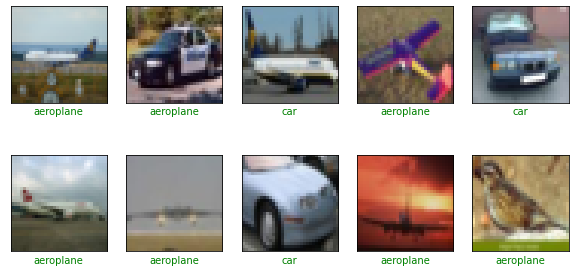

In [8]:
def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]),10,replace=False)
  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])

    # show correct prediction in green and wrong in red
    col ='green' if np.argmax(Y_Train[i]) == np.argmax(Y_Train[i]) else 'red'
    plt.xlabel(cifar_classes[np.argmax(Y_Train[i])],color=col)
  plt.show()

show_random_examples(X_Train,Y_Train,Y_Train)

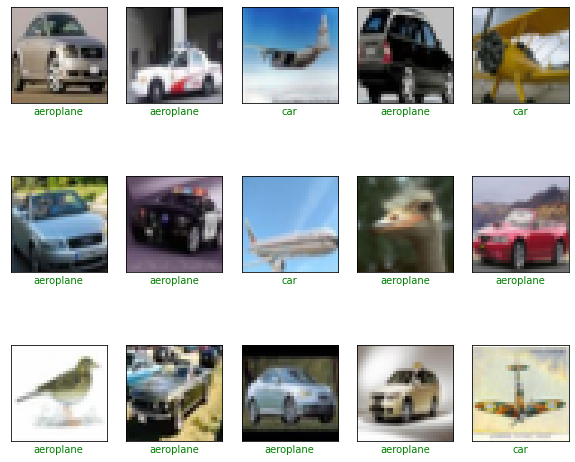

In [9]:
plt.figure (figsize=(10,15))
for i in range (15):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_Train[i], cmap=plt.cm.binary)
 
  col ='green' if np.argmax(Y_Train[i]) == np.argmax(Y_Train[i]) else 'red'
  plt.xlabel(cifar_classes[np.argmax(Y_Train[i])],color=col)
  
plt.show()

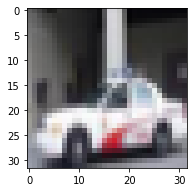

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(330+1+1)
plt.imshow(X_Train[1])
plt.show()

In [11]:
#Step 3: Model Creation

#model = Sequential()

#model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), padding = 'same', activation='relu',
 #         kernel_constraint = maxnorm(3)))
#model.add(Dropout(0.2))
#model.add(Conv2D (32, (3, 3) , activation='relu', padding='same', kernel_constraint=maxnorm(3)))
#model.add(MaxPooling2D(pool_size=(10,10)))
#model.add(Flatten())
#model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))

#It is to prevent any test loss or loss in accuracy
#model.add(Dropout(0.5))


#model.add(Dense(num_classes, activation= 'relu'))

#Configure the optimizer

#sgd = SGD (learning_rate=0.01, momentum=0.9, decay= (0.01/25), nesterov = False)

#compile the model

#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])




def create_model():
  def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters,3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model
  
  model = Sequential()
  model.add(Input(shape=(32,32,3)))
  # add conv blocks
  model = add_conv_block(model,32)
  model = add_conv_block(model,64)
  model = add_conv_block(model,128)

  model.add(Flatten())
  model.add(Dense(3, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
  return model
  
model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [13]:
#model.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=10, batch_size=32)

history = model.fit(X_Train, Y_Train, epochs=10)

Epoch 1/10


ValueError: ignored

In [14]:
h = model.fit(X_Train/255,Y_Train,validation_data=(X_Test/255,Y_Test),
              epochs=10,batch_size=128,
              callbacks=[
                tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),
                tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                   save_best_only=True,save_weights_only=False,
                                                   monitor='val_accuracy')
              ]
)

Epoch 1/10


ValueError: ignored

In [15]:
#Step 4: Evaluation
loss, accuracy_= model.evaluate(X_Test, Y_Test)
print("Accuracy of this program is: ", accuracy_*100)

ValueError: ignored

IndexError: ignored

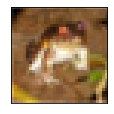

In [38]:
plt.figure (figsize=(10,15))
for i in range (15):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_Train[i], cmap=plt.cm.binary)

  col ='green' if np.argmax(Y_Train[i]) == np.argmax(Y_Train[i]) else 'red'
  plt.xlabel(cifar_classes[np.argmax(Y_Train[i])],color=col)
  
plt.show()

In [ ]:
print('Example training images and their labels: ' + str([x[0] for x in Y_Train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in Y_Train[0:1]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_Train[i]
    axarr[i].imshow(img)
plt.show()